### Tugas Unjuk Keterampilan - Bahasa Pemrograman Statistika untuk Data Scientist

## Nama : Rajabandanu Subhi

## No Kartu Prakerja : 3662202383520432

ggwp


In [ ]:
# IMPORT THE LIBRARY
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
data = pd.read_csv("/content/supermarket_sales.csv")

In [ ]:
data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

## TUGAS 1 - Cleaning

- Missing Value check and replace

In [ ]:
# Missing Value Check
data.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [ ]:
# Handle Missing Value
# jika ditemukan missing value

data['gross margin percentage'].fillna(data['gross margin percentage'].median(), inplace=True)
data['gross income'].fillna(data['gross income'].median(), inplace=True)
data['Rating'].fillna(data['Rating'].median(), inplace=True)


## TUGAS 2 - Highest Rating & Gross Income

a. Data Branch dengan rating tertinggi

b. Data Product Line dengan gross income tertinggi

In [ ]:
# Data Branch dengan rating tertinggi
highest_rating_branch = data[data['Rating'] == data['Rating'].max()]['Branch'].values[0]


In [ ]:
print(f"The branch with the highest rating is {highest_rating_branch}.")

The branch with the highest rating is C.


In [ ]:
# Data Product Line dengan gross income tertinggi
highest_grossin_product = data[data['gross income'] == data['gross income'].max()]['Product line'].values[0]

In [ ]:
print(f"The product line with the highest gross income is {highest_grossin_product}.")

The product line with the highest gross income is Fashion accessories.


a. Branch "C" dengan rating tertinggi

b. Product line "Fashion  Accessories" dengan gross income tertinggi

## TUGAS 3 - Pie Chart

- visualize comparison of male and female buyers










In [ ]:
# Count the gender value
gender_counts = data['Gender'].value_counts()


In [ ]:
gender_counts

Female    501
Male      499
Name: Gender, dtype: int64

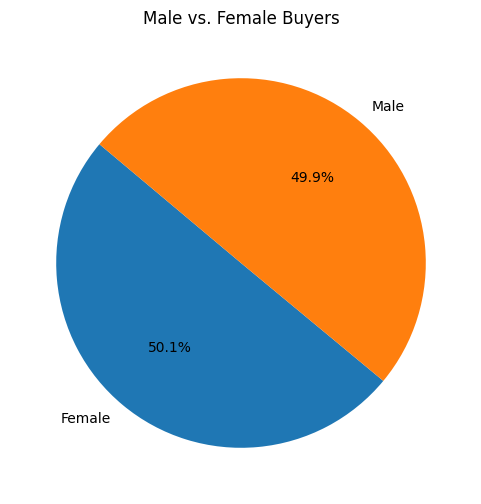

In [ ]:
# Create a pie chart
plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=140)

# Add a title
plt.title("Male vs. Female Buyers")

# Display the pie chart
plt.show()

# TUGAS 4 - Bar Chart

- visualize of  **'TOTAL REVENUE'**  in bar chart



In [ ]:
# formula for renevue = unit price*quantity
# create a new column for revenue
data['Revenue'] = data['Unit price'] * data['Quantity']
branch_revenue = data.groupby('Branch')['Revenue'].sum()
city_revenue = data.groupby('City')['Revenue'].sum()
product_revenue = data.groupby('Product line')['Revenue'].sum()

In [ ]:
branch_revenue

Branch
A    101143.21
B    101140.64
C    105303.53
Name: Revenue, dtype: float64

In [ ]:
data.tail()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,Revenue
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,40.35
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,973.80
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,31.84
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,65.82
999,849-09-3807,A,Yangon,Member,Female,Fashion accessories,88.34,7,30.9190,649.2990,2/18/2019,13:28,Cash,618.38,4.761905,30.9190,6.6,618.38


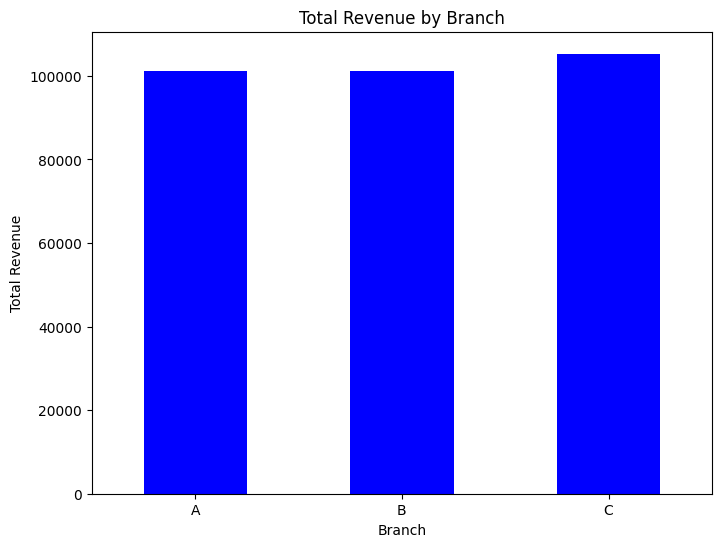

In [ ]:
# Visualize the Revenue
plt.figure(figsize=(8, 6))
branch_revenue.plot(kind='bar', color='blue')
plt.title("Total Revenue by Branch")
plt.xlabel("Branch")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

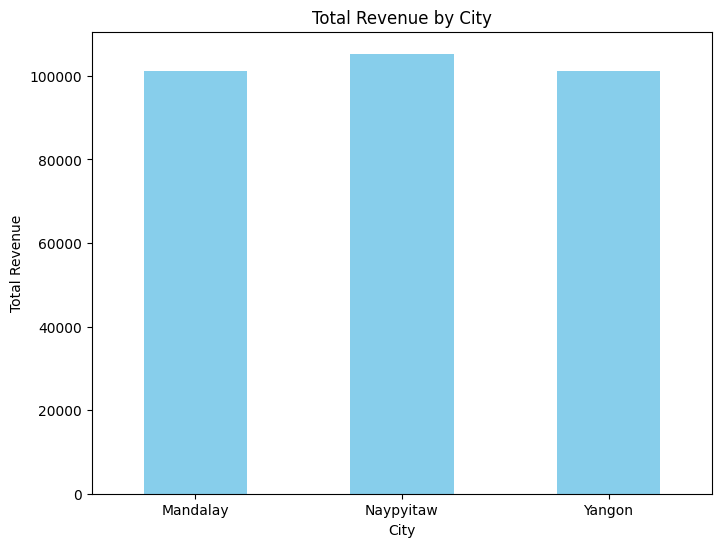

In [ ]:
# Visualize the Revenue
plt.figure(figsize=(8, 6))
city_revenue.plot(kind='bar', color='skyblue')
plt.title("Total Revenue by City")
plt.xlabel("City")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

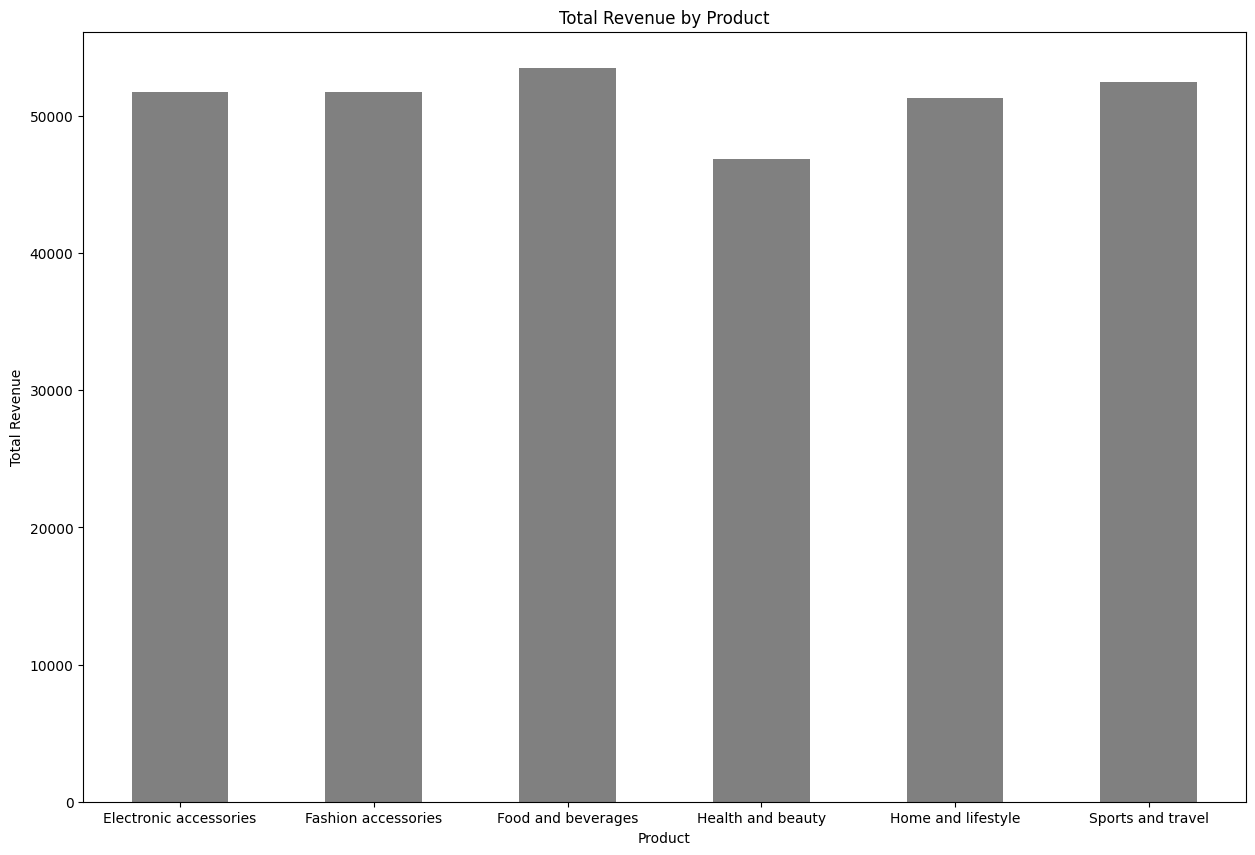

In [ ]:
# Visualize the Revenue
plt.figure(figsize=(15, 10))
product_revenue.plot(kind='bar', color='grey')
plt.title("Total Revenue by Product")
plt.xlabel("Product")
plt.ylabel("Total Revenue")
plt.xticks(rotation=0)
plt.show()

### **GGWP - WP**
#### Code By : Rajab

#### Thank You